# Processamento de Texto

In [48]:
import pathlib
import os
import pandas as pd
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import textract
import re
from nltk.tokenize import word_tokenize
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora

In [46]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/sarah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/sarah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sarah/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

In [4]:
datapath = pathlib.Path('../Python_PPGGOC/corpus/')
outputs = pathlib.Path('../Python_PPGGOC/relatorio/')

In [5]:
onlyfiles = [f for f in os.listdir(datapath)]
onlyfiles

print('Files in the folder:')
for i, w in enumerate(onlyfiles):
    print(i+1, '--' ,w)

Files in the folder:
1 -- StarWars.csv
2 -- articles.csv
3 -- Artigo2.pdf
4 -- Lista_Elis.csv
5 -- Artigo1.pdf


In [6]:
df = pd.read_csv(os.path.join(datapath, 'articles.csv'))
df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [7]:
df.columns

Index(['author', 'claps', 'reading_time', 'link', 'title', 'text'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
author          337 non-null object
claps           337 non-null object
reading_time    337 non-null int64
link            337 non-null object
title           337 non-null object
text            337 non-null object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


In [9]:
df['text'] = df['title'] + " "
texts = df['text'].sum()
texts[0:1000]

'Chatbots were the next big thing: what happened? – The Startup – Medium Python for Data Science: 8 Concepts You May Have Forgotten Automated Feature Engineering in Python – Towards Data Science Machine Learning: how to go from Zero to Hero – freeCodeCamp Reinforcement Learning from scratch – Insight Data Intuitively Understanding Convolutions for Deep Learning An intro to Machine Learning for designers – UX Collective The Big List of DS/ML Interview Resources – Towards Data Science Must know Information Theory concepts in Deep Learning (AI) What I learned from interviewing at multiple AI companies and start-ups From Ballerina to AI Researcher: Part I – buZZrobot 3 Ways to Apply Latent Semantic Analysis on Large-Corpus Text on macOS Terminal, JupyterLab, and... Deep Learning Is Going to Teach Us All the Lesson of Our Lives: Jobs Are for Machines Machine Learning is Fun! – Adam Geitgey – Medium Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks Machine Lear

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['-',''])

In [11]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l.strip('–') for l in list_words]
list_words = [l for l in list_words if l not in stopwords]

freqdist = Counter(list_words)
freqdist.most_common(50)

[('learning', 124),
 ('medium', 95),
 ('machine', 60),
 ('deep', 56),
 ('neural', 48),
 ('data', 45),
 ('part', 41),
 ('ai', 39),
 ('networks', 36),
 ('science', 28),
 ('tensorflow', 28),
 ('intelligence', 25),
 ('towards', 23),
 ('artificial', 21),
 ('—', 18),
 ('fun', 17),
 ('simple', 17),
 ('network', 17),
 ('reinforcement', 14),
 ('using', 14),
 ('build', 13),
 ('python', 12),
 ('big', 10),
 ('understanding', 10),
 ('new', 10),
 ('r-cnn', 10),
 ('future', 10),
 ('chatbots', 8),
 ('2', 8),
 ('guide', 8),
 ('know', 7),
 ('3', 7),
 ('google', 7),
 ('segmentation', 7),
 ('algorithms', 7),
 ('0', 7),
 ('q-learning', 7),
 ('raspberry', 7),
 ('pi', 7),
 ('happened', 6),
 ('adam', 6),
 ('geitgey', 6),
 ('recognition', 6),
 ('five', 6),
 ('internet', 6),
 ('1', 6),
 ('detect', 6),
 ('tables', 6),
 ('stock', 6),
 ('understand', 6)]

In [12]:
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

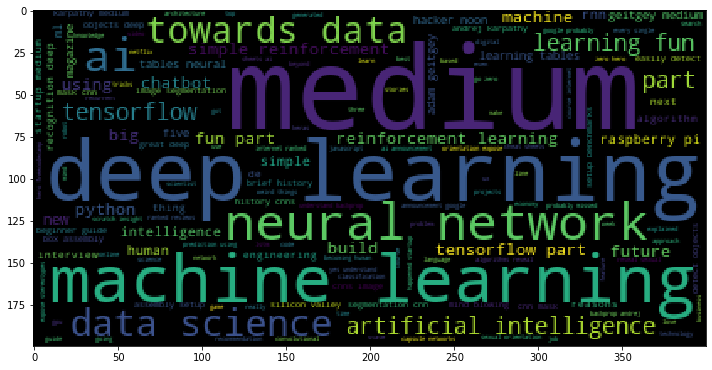

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

In [14]:
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(datapath,filename)).decode('utf-8')
    print('\nTexto:\n', text[0:50])
    raw_texts += '\n'+ text


Texto:
 Representação de informações não estruturadas em
a

Texto:
 Plataforma CLAV: contributo para a disponibilizaçã


In [17]:
cleaned_texts = raw_texts.lower()
cleaned_texts = re.sub(' +',' ', cleaned_texts) #Remove multiple spaces
cleaned_texts = re.sub(r'\n\s*\n', '\n', cleaned_texts)

In [18]:
list_words = cleaned_texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]

freqdist = Counter(list_words)
freqdist.most_common(30)

[('de', 774),
 ('e', 341),
 ('da', 236),
 ('que', 185),
 ('para', 139),
 ('dados', 133),
 ('em', 126),
 ('informação', 93),
 ('os', 87),
 ('na', 80),
 ('com', 76),
 ('dos', 74),
 ('como', 67),
 ('um', 65),
 ('modelo', 61),
 ('uma', 60),
 ('à', 58),
 ('plataforma', 57),
 ('por', 53),
 ('ou', 53),
 ('se', 51),
 ('entre', 51),
 ('das', 45),
 ('classe', 45),
 ('data', 44),
 ('é', 40),
 ('ser', 38),
 ('não', 36),
 ('processos', 36),
 ('lista', 36)]

In [20]:
# Using NLTK
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(cleaned_texts)
nltk_text = nltk.Text(tokens)

In [21]:
max_items = 30
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(nltk_text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print(a, b)

destino final
encontro ibérico
ibérico edicic
ix encontro
administração pública
atributo textual
lista consolidada
9 ]{
não estruturados
º nível
modelo ontológico
bem como
entre 9
plataforma clav
pode ser
informação arquivística
dados abertos
que contém
textual que
e 11
da lc
da lista
da informação
dos dados
9 e
classificação e
da plataforma
da entidade
o modelo
de 2019


In [22]:
max_items = 30
freq_min_t = 6
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(nltk_text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print(a, b, c)

encontro ibérico edicic
ix encontro ibérico
disponível na internet
o ´ neil
9 ]{ 3
textual que contém
atributo textual que
um modelo ontológico
dados não estruturados
identificação e controlo
9 e 11
classificação e avaliação
prazo de conservação
forma de contagem
tabelas de seleção
prazos de conservação
julho de 2019
auto de eliminação
11 de julho
tabela de seleção
entre 9 e
processos de negócio
zona de identificação
que contém o
avaliação da informação
a lista consolidada
para a classificação
a plataforma clav
elementos de informação
do auto de


In [29]:
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in df['text']]

print(gen_docs)

[['chatbots', 'were', 'the', 'next', 'big', 'thing', ':', 'what', 'happened', '?', '–', 'the', 'startup', '–', 'medium'], ['python', 'for', 'data', 'science', ':', '8', 'concepts', 'you', 'may', 'have', 'forgotten'], ['automated', 'feature', 'engineering', 'in', 'python', '–', 'towards', 'data', 'science'], ['machine', 'learning', ':', 'how', 'to', 'go', 'from', 'zero', 'to', 'hero', '–', 'freecodecamp'], ['reinforcement', 'learning', 'from', 'scratch', '–', 'insight', 'data'], ['intuitively', 'understanding', 'convolutions', 'for', 'deep', 'learning'], ['an', 'intro', 'to', 'machine', 'learning', 'for', 'designers', '–', 'ux', 'collective'], ['the', 'big', 'list', 'of', 'ds/ml', 'interview', 'resources', '–', 'towards', 'data', 'science'], ['must', 'know', 'information', 'theory', 'concepts', 'in', 'deep', 'learning', '(', 'ai', ')'], ['what', 'i', 'learned', 'from', 'interviewing', 'at', 'multiple', 'ai', 'companies', 'and', 'start-ups'], ['from', 'ballerina', 'to', 'ai', 'researcher

In [36]:
dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary[5])
print(dictionary.token2id['data'])
print("Number of words in dictionary:",len(dictionary))
for i in range(len(dictionary)):
    print(i, dictionary[i])

medium
15
Number of words in dictionary: 931
0 :
1 ?
2 big
3 chatbots
4 happened
5 medium
6 next
7 startup
8 the
9 thing
10 were
11 what
12 –
13 8
14 concepts
15 data
16 for
17 forgotten
18 have
19 may
20 python
21 science
22 you
23 automated
24 engineering
25 feature
26 in
27 towards
28 freecodecamp
29 from
30 go
31 hero
32 how
33 learning
34 machine
35 to
36 zero
37 insight
38 reinforcement
39 scratch
40 convolutions
41 deep
42 intuitively
43 understanding
44 an
45 collective
46 designers
47 intro
48 ux
49 ds/ml
50 interview
51 list
52 of
53 resources
54 (
55 )
56 ai
57 information
58 know
59 must
60 theory
61 and
62 at
63 companies
64 i
65 interviewing
66 learned
67 multiple
68 start-ups
69 ballerina
70 buzzrobot
71 part
72 researcher
73 ,
74 ...
75 3
76 analysis
77 apply
78 jupyterlab
79 large-corpus
80 latent
81 macos
82 on
83 semantic
84 terminal
85 text
86 ways
87 all
88 are
89 going
90 is
91 jobs
92 lesson
93 lives
94 machines
95 our
96 teach
97 us
98 !
99 adam
100 fun
101 geit

In [37]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
for d in corpus:
    print(d)



[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2)]
[(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]
[(12, 1), (15, 1), (20, 1), (21, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]
[(0, 1), (12, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1)]
[(12, 1), (15, 1), (29, 1), (33, 1), (37, 1), (38, 1), (39, 1)]
[(16, 1), (33, 1), (40, 1), (41, 1), (42, 1), (43, 1)]
[(12, 1), (16, 1), (33, 1), (34, 1), (35, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)]
[(2, 1), (8, 1), (12, 1), (15, 1), (21, 1), (27, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)]
[(14, 1), (26, 1), (33, 1), (41, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)]
[(11, 1), (29, 1), (56, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]
[(0, 1), (12, 1), (29, 1), (35, 1), (56, 1), (64, 1), (69, 1), (70, 1), (71, 1), (72, 1)]
[(35, 1), (61,

In [38]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)
s = 0
for i in corpus:
    s += len(i)
print(s)

TfidfModel(num_docs=337, num_nnz=3713)
3713


In [39]:
sims = gensim.similarities.Similarity(outputs,tf_idf[corpus],num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 337 documents in 0 shards (stored under ../Python_PPGGOC/relatorio)
<class 'gensim.similarities.docsim.Similarity'>


In [40]:
query_doc = [w.lower() for w in word_tokenize("Socks are a force for good.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

['socks', 'are', 'a', 'force', 'for', 'good', '.']
[(16, 1), (88, 1), (120, 1), (223, 1), (239, 1)]
[(16, 0.2502662550613916), (88, 0.4896604214740585), (120, 0.3866676426083141), (223, 0.21815747014971532), (239, 0.7074566598718249)]


In [47]:
stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in df['text']]



In [49]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [50]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)


In [51]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.122*"–" + 0.049*"medium" + 0.023*"network"'), (1, '0.024*"artificial" + 0.024*"intelligence" + 0.020*"tensorflow"'), (2, '0.078*"learning" + 0.073*"–" + 0.040*"machine"')]
